In [1]:
## import necessary libraries
import os
from sklearn import datasets
from xgboost_prediction.build_predict_model import predict_with_model
from xgboost_prediction.visualize_model import plot_feature_importance, plot_tree_structure 

/Users/utpalkumar/miniconda3/envs/xgboost_training/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
params = {
    'objective': 'multi:softmax',  # For multiclass classification
    'learning_rate': 0.1,
    'max_depth': 5,
    'eval_metric': 'mlogloss',  # Multiclass log loss
    'num_class': 3  # Number of classes in the Iris dataset
}


>> Model file iris_models/iris_model_features.json not found. Training model....
>> XGBoost Test Accuracy (4 features): 1.000000
>> Misclassified Samples (4 features): 0
>> SHAP Summary Plot (Top 10 Global Feature Importance):


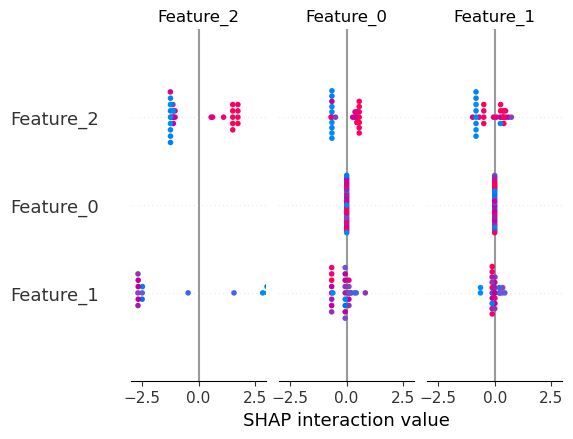

<Figure size 640x480 with 0 Axes>

In [4]:
# Ensure y is a one-dimensional array
y = y.ravel()

# Convert y to integer type if it is not already
y = y.astype(int)

# Perform predictions
model_path = 'iris_models/iris_model_features.json'
fig = predict_with_model(X, y, model_path, feature_count=X.shape[-1], params=params, 
                         output_shap_plot=True, plot_type='shap_summary', multiclass=True, filter_features=False)

<Figure size 3000x2400 with 0 Axes>

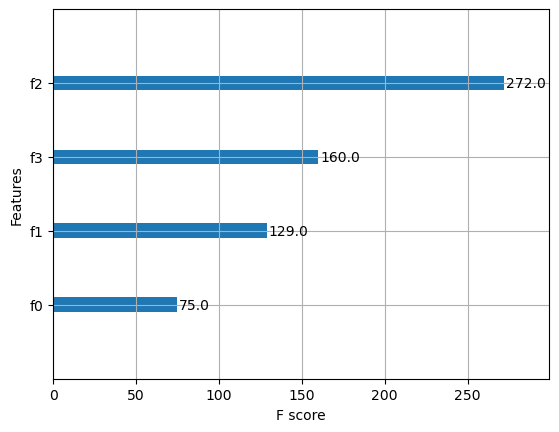

<module 'matplotlib.pyplot' from '/Users/utpalkumar/miniconda3/envs/xgboost_training/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [5]:
plot_feature_importance(model_path)
# visualize_model(model36_path, importance_type='gain')

<Figure size 3000x2400 with 0 Axes>

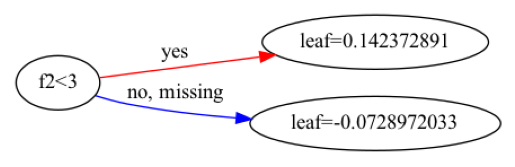

<module 'matplotlib.pyplot' from '/Users/utpalkumar/miniconda3/envs/xgboost_training/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [6]:
plot_tree_structure(model_path, tree_index=0)